1. Of course we do have to start by importing all of our data and libraies. I will do data first and as I want to use more libraries, I will install by case, forr now, I will only be adding pandas. I will use my first cell only for libraries and data. 
2. We have 4 different data files to use. I'm a very step by step person and the first thing I have looked at is the Cost of Living File as well as the Country codes file.
3. My first thought is these need to be combined. I'm thinking we take the Cost of living file, split the city column. the format is "city, country" so we split after the comma into two columns, city and country. we can then join these two data sets by the country column. From there I will decide if I want to group it. 

# Project 2
### Auriana Anderson
### December 6, 2024

In [3941]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
cost_of_living = pd.read_csv('Project 2/Project Data/cost_of_living.csv')
country_codes = pd.read_excel('Project 2/Project Data/country_codes.xlsx')
ds_salaries = pd.read_csv('Project 2/Project Data/ds_salaries.csv')
Fyi = pd.read_csv('Project 2/Project Data/Levels_Fyi_Salary_Data.csv')
print(cost_of_living)

     Rank                  City  Cost of Living Index  Rent Index  \
0     NaN     Hamilton, Bermuda                149.02       96.10   
1     NaN   Zurich, Switzerland                131.24       69.26   
2     NaN    Basel, Switzerland                130.93       49.38   
3     NaN      Zug, Switzerland                128.13       72.12   
4     NaN   Lugano, Switzerland                123.99       44.99   
..    ...                   ...                   ...         ...   
573   NaN         Kanpur, India                 20.79        3.60   
574   NaN     Karachi, Pakistan                 20.75        4.84   
575   NaN  Rawalpindi, Pakistan                 20.52        4.78   
576   NaN      Multan, Pakistan                 18.68        2.94   
577   NaN    Peshawar, Pakistan                 18.55        2.37   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            124.22           157.89                  155.22   
1          

This step turned out to be more complicated as I realized in the city column some are formated as [city, state] and some are[city, state, country]. I will attempt to create a function to handle this. Im expecting some of the results in my new city column to be [city, state] while some will be [city]
The purpose of this is to be able to do a join by the country code.

In [3944]:
cost_of_living['City'] = cost_of_living['City'].astype(str)

def city_country(city):
#best method is to split on the second comma which will keep
    two_parts = city.rsplit(',',2)
    if len(two_parts) == 3:
        return two_parts[0].strip(), two_parts[1].strip(), two_parts[2].strip()
    elif len(two_parts) == 2:
        return two_parts[0].strip(), 'no state provided', two_parts[1].strip()
    else:
        return two_parts[0].strip(), 'no state provided','no country provided'

cost_of_living[['city', 'state','country']] = cost_of_living['City'].apply(lambda x: pd.Series(city_country(x)))

cost_of_living['country'] = cost_of_living['country'].str.strip().str.lower()


In [3946]:
cost_of_living['city'] = cost_of_living['city'].astype(str).str.strip().str.lower()
cost_of_living['state'] = cost_of_living['state'].astype(str).str.strip().str.lower()
cost_of_living['country'] = cost_of_living['country'].astype(str).str.strip().str.lower()

print(cost_of_living.iloc[293])

Rank                                                   NaN
City                              Akron, OH, United States
Cost of Living Index                                  62.2
Rent Index                                            22.9
Cost of Living Plus Rent Index                       43.78
Groceries Index                                      63.55
Restaurant Price Index                               55.56
Local Purchasing Power Index                        102.89
city                                                 akron
state                                                   oh
country                                      united states
Name: 293, dtype: object


Now I think we remove the original City column so there is no confusion further down the line (the original column is City and my new columns are city and country). We should also be good to do our join after that.

I looked at a column where I knew there was three parts city, state country and realized the country codes popped up as Nan this means that maybe I need to first of all change them all to lowercase and create a standard so that they match properly, so I will do another function to create standardized country names before I merge below so that they all properly map. 

In [3949]:
cost_of_living.drop('City', axis = 1, inplace = True)

country_codes.rename(columns = {'Country':'country'}, inplace = True)

# print(cost_of_living)

Standardizing country names so that the codes are mapping properly below- I think I have to create a dictionary- and then reurunning everything below:

In [3952]:
country_codes['country'] = country_codes['country'].astype(str).str.strip().str.lower()

country_codes = country_codes.drop_duplicates(subset=['country'])

In [3954]:
us_states_abbrev = {
    
    'alabama': 'al','alaska': 'ak', 'arizona': 'az', 'arkansas': 'ar', 'california': 'ca'
    ,'colorado': 'co', 'connecticut': 'ct','delaware': 'de', 'florida': 'fl', 'georgia': 'ga' 
    ,'hawaii': 'hi','idaho': 'id', 'illinois': 'il', 'indiana': 'in', 'iowa': 'ia' 
    ,'kansas': 'ks','kentucky': 'ky', 'louisiana': 'la', 'maine': 'me', 'maryland': 'md'
    ,'massachusetts': 'ma', 'michigan': 'mi', 'minnesota': 'mn', 'mississippi': 'ms'
    ,'missouri': 'mo', 'montana': 'mt','nebraska': 'ne', 'nevada': 'nv', 'new hampshire': 'nh' 
    ,'new jersey': 'nj', 'new mexico': 'nm', 'new york': 'ny', 'north carolina': 'nc' 
    ,'north dakota': 'nd', 'ohio': 'oh', 'oklahoma': 'ok', 'oregon': 'or', 'pennsylvania': 'pa'
    ,'rhode island': 'ri', 'south carolina': 'sc', 'south dakota': 'sd', 'tennessee': 'tn' 
    ,'texas': 'tx','utah': 'ut', 'vermont': 'vt', 'virginia': 'va', 'washington': 'wa' 
    ,'west virginia': 'wv', 'wisconsin': 'wi', 'wyoming': 'wy','district of columbia': 'dc'
}

In [3956]:
country_map = {
    'united states of america (the)':'united states'
    ,'bahamas (the)': 'bahamas','russian federation (the)': 'russia'
    ,'united kingdom of great britain and northern ireland (the)':'united kingdom'
    ,'netherlands (the)':'netherlands','korea (the republic of)':'south korea'
    ,'taiwan (province of china)':'taiwan','united arab emirates (the)':'united arab emirates'
    ,'philippines (the)':'philippines' ,'czechia':'czech republic'
    ,"côte d'ivoire":'ivory coast','venezuela (bolivarian republic of)':'venezuela'
    ,'dominican republic (the)':'dominican republic','viet nam':'vietnam'
    ,'syrian arab republic':'syria','republic of north macedonia':'north macedonia'
    ,'tanzania, united republic of':'tanzania','moldova (the republic of)':'moldova'
    ,'kosovo (disputed territory)':'kosovo','iran (islamic republic of)':'iran'
    ,'bolivia (plurinational state of)':'bolivia','hong kong (sar)': 'hong kong'
    ,'norway':'norway','bermuda': 'bermuda' ,'lebanon': 'lebanon'
    ,'jersey': 'jersey' ,'israel': 'israel','iceland': 'iceland'
    ,'luxembourg': 'luxembourg','finland': 'finland','macao': 'macao'
    ,'cyprus': 'cyprus','qatar': 'qatar','trinidad and tobago': 'trinidad and tobago'
    ,'greece': 'greece','maldives': 'maldives','slovenia': 'slovenia','cuba': 'cuba' ,'estonia': 'estonia'
    ,'panama': 'panama','bahrain': 'bahrain','china': 'china','saudi arabia': 'saudi arabia'
    ,'jordan': 'jordan','uruguay': 'uruguay','portugal': 'portugal','croatia': 'croatia'
    ,'jamaica': 'jamaica','latvia': 'latvia','oman': 'oman','senegal': 'senegal'
    ,'ethiopia': 'ethiopia','thailand': 'thailand','cambodia': 'cambodia'
    ,'slovakia': 'slovakia','suriname': 'suriname','kuwait': 'kuwait','costa rica': 'costa rica'
    ,'lithuania': 'lithuania','hungary': 'hungary' ,'zimbabwe': 'zimbabwe','chile': 'chile'
    ,'el salvador': 'el salvador','south africa': 'south africa','guatemala': 'guatemala'
    ,'poland': 'poland','indonesia': 'indonesia','botswana': 'botswana','bulgaria': 'bulgaria'
    ,'ecuador': 'ecuador','romania': 'romania','serbia': 'serbia'
    ,'malaysia': 'malaysia' ,'morocco': 'morocco','montenegro': 'montenegro'
    ,'fiji': 'fiji','ghana': 'ghana' ,'bosnia and herzegovina': 'bosnia and herzegovina'
    ,'iraq': 'iraq','nigeria': 'nigeria','syria': 'syria','uganda': 'uganda'
    ,'kenya': 'kenya' ,'argentina': 'argentina','bangladesh': 'bangladesh'
    ,'mongolia': 'mongolia','peru': 'peru','ukraine': 'ukraine' ,'armenia': 'armenia'
    ,'tanzania': 'tanzania' ,'sri lanka': 'sri lanka','zambia': 'zambia','belarus': 'belarus'
    ,'egypt': 'egypt','rwanda': 'rwanda','azerbaijan': 'azerbaijan','turkey': 'turkey'
    ,'georgia': 'georgia','paraguay': 'paraguay' ,'kazakhstan': 'kazakhstan'
    ,'tunisia': 'tunisia','nepal': 'nepal','algeria': 'algeria','uzbekistan': 'uzbekistan'
    ,'colombia': 'colombia' ,'kyrgyzstan': 'kyrgyzstan','pakistan': 'pakistan'
    ,'afghanistan': 'afghanistan','marshall islands (the)':'marshall islands'
}

country_codes['country'] = country_codes['country'].replace(country_map)

print(country_codes.iloc[181])

country         russia
Alpha-2 code        RU
Alpha-3 code       RUS
Numeric            643
Name: 181, dtype: object


updating country for the united states now have No country provided

In [3959]:
def country_update(each_row):
    if each_row['country'] == 'no country provided':
        state = each_row['location'].split(',',1)[-1].strip()
        if state in us_states_abbrev:
            each_row['country'] = 'united states'
    return each_row

cost_of_living = cost_of_living.apply(country_update, axis = 1)

cost_of_living_countries = set(cost_of_living['country'].unique())
country_codes_countries = set(country_codes['country'].unique())

# print(cost_of_living_countries)
# print(country_codes_countries)

In [3961]:
cost_of_living_with_codes = cost_of_living.merge(country_codes
                                                 ,on = 'country'
                                                 ,how = 'outer')

print(cost_of_living_with_codes)

     Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0     NaN                 21.35        3.17                           12.83   
1     NaN                 38.68       11.33                           25.86   
2     NaN                 29.84        6.67                           18.98   
3     NaN                   NaN         NaN                             NaN   
4     NaN                   NaN         NaN                             NaN   
..    ...                   ...         ...                             ...   
696   NaN                   NaN         NaN                             NaN   
697   NaN                   NaN         NaN                             NaN   
698   NaN                 33.57       10.18                           22.60   
699   NaN                 45.69        9.56                           28.75   
700   NaN                   NaN         NaN                             NaN   

     Groceries Index  Restaurant Price Index  Local

identifying missing country codes so that I can add mapping

In [3964]:
cost_of_living_with_codes_clean = cost_of_living_with_codes.drop(index = 535)
#print(cost_of_living_with_codes_clean)
print(cost_of_living_with_codes_clean.iloc[49])
print(cost_of_living_with_codes_clean.shape)

Rank                                            NaN
Cost of Living Index                          36.84
Rent Index                                    11.08
Cost of Living Plus Rent Index                24.77
Groceries Index                               29.88
Restaurant Price Index                        31.75
Local Purchasing Power Index                  43.54
city                                       brasilia
state                             no state provided
country                                      brazil
Alpha-2 code                                     BR
Alpha-3 code                                    BRA
Numeric                                        76.0
Name: 49, dtype: object
(700, 13)


The only missing code now is kosovo which for what we have in our data doesn't matter. I Will delete it.

Now that those are merged. I will take a look at the next two data sets: ds_salaries and Levels_Fyi_salary_Data and see what I might use/need from there to see if I need to do more merging (probably) before I do the salary conversions to USD. I will go ahead and add these data sets at the top.

1. Focusing on Fyi_Salary_Data, I think we do another clean of the location column. I think we might also consider making everythin lowercase before the merge so that there is no difficulties when merging. I will use the same function as I did before but changing names/values

In [3968]:
Fyi['location'] = Fyi['location'].astype(str).str.strip().str.lower()

def location_split(location):
    three_parts = location.rsplit(',',2)
    if len(three_parts) == 3:
        return three_parts[0].strip(), three_parts[1].strip(), three_parts[2].strip()
    elif len(three_parts) ==2 :
        return three_parts[0].strip(), three_parts[1].strip(), 'no country provided'
    else:
        return three_parts[0].strip(), 'no state provided', 'no country provided'
        
Fyi[['city', 'state', 'country']] = Fyi['location'].apply(lambda x: pd.Series(location_split(x)))

Fyi['country'] = Fyi['country'].replace(['south',
                                       'korea south',
                                       'south korea'], 
                                       'south korea')

Fyi.loc[(Fyi['city'] == 'seoul, kg') & 
(Fyi['state'] == 'korea'), ['city', 'state']] = ['seoul', 'kg']

Fyi['city'] = Fyi['city'].astype(str).str.strip().str.lower()
Fyi['state'] = Fyi['state'].astype(str).str.strip().str.lower()
Fyi['country'] = Fyi['country'].astype(str).str.strip().str.lower()

# print(Fyi.iloc[54996])

In [3969]:
# print(Fyi.iloc[116])

I need to create country mappings for Fyi as well
Maybe also a US state map for Fyi

In [3971]:
country_map_fyi = {
    'hong kong (sar)': 'hong kong'
    ,'marshall islands (the)':'marshall islands'
    ,'burma':'myanmar'
    ,'netherlands antilles':'netherlands'
    ,'yugoslavia': 'serbia'
}

Fyi['country'] = Fyi['country'].replace(country_map_fyi)

In [3972]:
# print(Fyi['country'].nunique()) 
# print(cost_of_living_with_codes_clean['country'].nunique()) 

unique_countries_fyi = Fyi['country'].unique()
unique_countries_colc = cost_of_living_with_codes_clean['country'].unique()

countries_in_fyi_not_in_colc = set(unique_countries_fyi) - set(unique_countries_colc)
print(f"in Fyi but not in cost_of_living_unique: {countries_in_fyi_not_in_colc}")

#south Korea wasn't in a standard format so I will have to adjust location_split above to accomodate for it
south_rows = Fyi[Fyi['country'] == 'south']
#print(south_rows)

in Fyi but not in cost_of_living_unique: {'no country provided'}


I think we actually concatenate ds_salaries and Fyi before merging with the other merged data (cost of living with country codes). First let me focus on the cleaning up the data sets

In [3974]:
print(Fyi)

                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3             Software Engineer   

       totalyearlycompensat

In [3975]:
Fyi.rename(columns ={'levels':'experience_level'
                    ,'totalyearlycompensation':'salary'
                    }, inplace = True)

Fyi['timestamp'] = pd.to_datetime(Fyi['timestamp'])

Fyi['work_year'] = Fyi['timestamp'].dt.year

Fyi = Fyi.drop(columns =['timestamp'])


Fyi.loc[Fyi['state'].str.lower().isin(us_states_abbrev.values()), 'country'] = 'united states'

# print(Fyi)

I think now I can create some type of conversion for the salaries so that they are all in usd

In [3983]:
no_country_df = Fyi[Fyi['country'] == 'no country provided']

#print(no_country_df)

#issues with some of the states still as 'no country provided-here is the fix:
Fyi.loc[
    (Fyi['country'] == 'no country provided') & 
    (Fyi['state'].str.lower().isin(us_states_abbrev.keys()))
, 'country'] = 'united utates'

#9061 could potentially affect my data so I will fix just this entry
Fyi.loc[9061, 'country'] = 'israel'
Fyi.loc[9061, 'state'] = 'no state provided'
# print(Fyi.loc[9061])
# print(Fyi.loc[9075])

In [3985]:
# unique_countries = Fyi['country'].unique()
# print(unique_countries)
# print(Fyi)
conversion_rates = {
'united states':1, 'united kingdom':1.26, 'ireland':1.05, 'india':0.01, 'belarus':0.30
 ,'no country provided':1 ,'canada':0.70 ,'russia':0.009, 'switzerland':1.12 ,'singapore':0.74
 ,'germany':1.05, 'japan':0.007,'sweden':0.09 ,'australia':0.64 ,'israel':0.28 ,'poland':0.24 ,'china':0.14
 ,'luxembourg':1.05 ,'czech republic':0.04 ,'pakistan':0.004 ,'new zealand':0.58, 'denmark':0.14,'france':1.05
 ,'hong kong':0.13 ,'south africa':0.06, 'united arab emirates':0.27, 'hungary':0.003, 'brazil':0.17
 ,'bulgaria':0.54 ,'philippines':0.01 ,'indonesia':0.00006,'puerto rico':1, 'taiwan':0.03, 'romania':0.21
 ,'mexico': 0.05,'costa rica':0.002, 'marshall islands': 1, 'vietnam': 0.000039 ,'panama':1, 'argentina':0.0010
 ,'norway':0.09, 'moldova': 0.05,'netherlands':1.05, 'estonia':1.05, 'kenya':0.008, 'turkey':0.03 ,'italy':1.05
 ,'lithuania':1.05, 'south korea':0.0007, 'ukraine':0.02, 'jordan':1.41, 'thailand':0.03, 'colombia':0.0002
 ,'serbia':0.009, 'portugal':1.05, 'guatemala':0.13 ,'slovakia':1.05 ,'bangladesh':0.008, 'finland':1.05 ,'chile':0.001
 ,'malaysia':0.23, 'peru':0.27 ,'austria':1.05, 'belgium':1.05 ,'myanmar':0.0005, 'qatar':0.27, 'saudi arabia':0.27
 ,'spain':1.05 ,'ghana':0.07 ,'kazakhstan':0.002 ,'uzbekistan':0.00008, 'armenia':0.003 ,'morocco':0.10 ,'iraq':0.0008
 ,'trinidad and tobago':0.15 ,'egypt':0.02
 }

#conversion rates from:www.xe.com

def salary_conversion(each_row):
    conversion_rate =conversion_rates.get(each_row['country'],1)
    return each_row['salary']*conversion_rate

Fyi['salary_in_usd'] = Fyi.apply(salary_conversion, axis = 1)

#based on this, the conversions seem to be working
# print(Fyi.iloc[60000])

Now I will add empty columns so its easy to concatenate Fyi and ds_salaries

In [3988]:
Fyi[['company_size', 'company_location'
    ,'remote_ratio', 'employee_residence'
     ,'salary_currency'
    ,'employment_type']] = np.nan

# print(Fyi.columns)

Fyi =Fyi[['work_year', 'level','employment_type'
          ,'title','salary','salary_currency'
          ,'salary_in_usd', 'employee_residence'
          ,'remote_ratio','company_location','company_size'
          ,'company','location', 'yearsofexperience'
          ,'yearsatcompany', 'tag', 'basesalary', 'stockgrantvalue', 'bonus'
          ,'gender', 'otherdetails', 'cityid', 'dmaid', 'rowNumber'
          ,'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool'
          ,'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More'
          ,'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'city', 'state','country']]
       
# print(Fyi)

Now I can add empty columns to ds_salaries that match Fyi for the concatenation

In [3991]:
ds_salaries.rename(columns = {'job_title':'title'}, inplace = True)

ds_salaries[['company','location', 'yearsofexperience'
          ,'yearsatcompany', 'tag', 'basesalary', 'stockgrantvalue', 'bonus'
          ,'gender', 'otherdetails', 'cityid', 'dmaid', 'rowNumber'
          ,'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool'
          ,'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More'
          ,'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'city', 'state','country']] = np.nan

#print(ds_salaries)

ds_salaries = ds_salaries.drop('Unnamed: 0'
                               , axis = 1)

print(ds_salaries)

     work_year experience_level employment_type                       title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee

I think the best method here is to assume the employee_residence is the country. I will find unique countries and map them so that they go to the country column properly.

In [3994]:
ds_salaries['country_code'] = ds_salaries['employee_residence']

ds_sal_codes = ds_salaries.merge(country_codes
                           ,left_on = 'country_code'
                           ,right_on = 'Alpha-2 code'
                                 , how = 'left')


ds_sal_codes = ds_sal_codes.drop(columns = ['Numeric'
                                            , 'Alpha-2 code'
                                            , 'Alpha-3 code'])

ds_sal_codes['country'] = ds_sal_codes['country_x'].fillna(ds_sal_codes['country_y'])

ds_sal_codes = ds_sal_codes.drop(columns = ['country_x'
                                            , 'country_y'
                                            , 'country_code'])

print(ds_sal_codes)

     work_year experience_level employment_type                       title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee

In [3996]:
ds_Fyi_combined = pd.concat([Fyi,ds_sal_codes], axis = 0
                            , ignore_index = True)

print(ds_Fyi_combined)

       work_year level employment_type                         title  salary  \
0           2017    L3             NaN               Product Manager  127000   
1           2017  SE 2             NaN             Software Engineer  100000   
2           2017    L7             NaN               Product Manager  310000   
3           2017    M1             NaN  Software Engineering Manager  372000   
4           2017    60             NaN             Software Engineer  157000   
...          ...   ...             ...                           ...     ...   
63244       2022   NaN              FT                 Data Engineer  154000   
63245       2022   NaN              FT                 Data Engineer  126000   
63246       2022   NaN              FT                  Data Analyst  129000   
63247       2022   NaN              FT                  Data Analyst  150000   
63248       2022   NaN              FT                  AI Scientist  200000   

      salary_currency  salary_in_usd em

This looks good, now we should subset for job title only to be Data Scientist, this may make the data a little easier to work with

In [3999]:
ds_title_only_ds_Fyi_combined = ds_Fyi_combined[ds_Fyi_combined['title'].str.lower() == 'data scientist']

print(ds_title_only_ds_Fyi_combined)

       work_year   level employment_type           title  salary  \
419         2018  Senior             NaN  Data Scientist  233000   
440         2018      64             NaN  Data Scientist  218000   
444         2018      26             NaN  Data Scientist  180000   
454         2018   Staff             NaN  Data Scientist  500000   
495         2018       5             NaN  Data Scientist  370000   
...          ...     ...             ...             ...     ...   
63234       2022     NaN              FT  Data Scientist  230000   
63235       2022     NaN              FT  Data Scientist  150000   
63238       2022     NaN              FT  Data Scientist  210000   
63240       2022     NaN              FT  Data Scientist  160000   
63241       2022     NaN              FT  Data Scientist  130000   

      salary_currency  salary_in_usd employee_residence  remote_ratio  \
419               NaN       233000.0                NaN           NaN   
440               NaN       218000.0 

Perhaps now we can merge our 2 major datasets: cost_of_living_with_codes and ds_title_only_ds_Fyi_combined

finally we shall inner join these datasets. If we need to do global averages and such, I can use the separate data sets

In [4003]:
cost_country_data_scientist_full = pd.merge(ds_title_only_ds_Fyi_combined,
                                            cost_of_living_with_codes 
                                            ,left_on =  'country'
                                            ,right_on = 'country'
                                            ,how = 'inner'
    
)


cost_country_data_scientist_full['city'] = cost_country_data_scientist_full['city_x'].fillna(cost_country_data_scientist_full['city_y'])

cost_country_data_scientist_full = cost_country_data_scientist_full.drop(columns = ['city_x'
                                                                                    , 'city_y'])

cost_country_data_scientist_full['state'] = cost_country_data_scientist_full['state_x'].fillna(cost_country_data_scientist_full['state_y'])

cost_country_data_scientist_full = cost_country_data_scientist_full.drop(columns = ['state_x'
                                                                                    , 'state_y'
                                                                                    ,'Alpha-2 code'
                                                                                    , 'Alpha-3 code'
                                                                                    , 'Numeric'])

print(cost_country_data_scientist_full)

        work_year   level employment_type           title  salary  \
0            2018  Senior             NaN  Data Scientist  233000   
1            2018  Senior             NaN  Data Scientist  233000   
2            2018  Senior             NaN  Data Scientist  233000   
3            2018  Senior             NaN  Data Scientist  233000   
4            2018  Senior             NaN  Data Scientist  233000   
...           ...     ...             ...             ...     ...   
231695       2022     NaN              FT  Data Scientist  130000   
231696       2022     NaN              FT  Data Scientist  130000   
231697       2022     NaN              FT  Data Scientist  130000   
231698       2022     NaN              FT  Data Scientist  130000   
231699       2022     NaN              FT  Data Scientist  130000   

       salary_currency  salary_in_usd employee_residence  remote_ratio  \
0                  NaN       233000.0                NaN           NaN   
1                  NaN 

I think we look at salary and how far it would go based off each cost of living index by country

In [4006]:
cost_country_data_scientist_full['salary_in_usd'] = cost_country_data_scientist_full['salary_in_usd'].fillna(0)

Columns_4_cost_of_living = [
    'Cost of Living Index'
    ,'Rent Index'
    ,'Cost of Living Plus Rent Index'
    ,'Groceries Index'
    ,'Restaurant Price Index'
    ,'Local Purchasing Power Index'	
]

for column in Columns_4_cost_of_living:
    new_col = f'{column}(salary to cost ratio)'
    cost_country_data_scientist_full[new_col] = cost_country_data_scientist_full['salary_in_usd']/cost_country_data_scientist_full[column].fillna(1)

In [4008]:
cost_country_data_scientist_full['country'] = cost_country_data_scientist_full['country'].str.title()
cost_country_data_scientist_full['city'] = cost_country_data_scientist_full['city'].str.title()

Top 10 countries for the indexes now. Creating a dictionary

In [4011]:
top_10_country_each_index ={}

for column in Columns_4_cost_of_living:
    sal_cols = f'{column}(salary to cost ratio)'
    top_10 = cost_country_data_scientist_full.nlargest(10, sal_cols)[['country'
                                                                      ,'city'
                                                                      , 'salary_in_usd'
                                                                      ,sal_cols]]
    top_10_country_each_index[column] = top_10

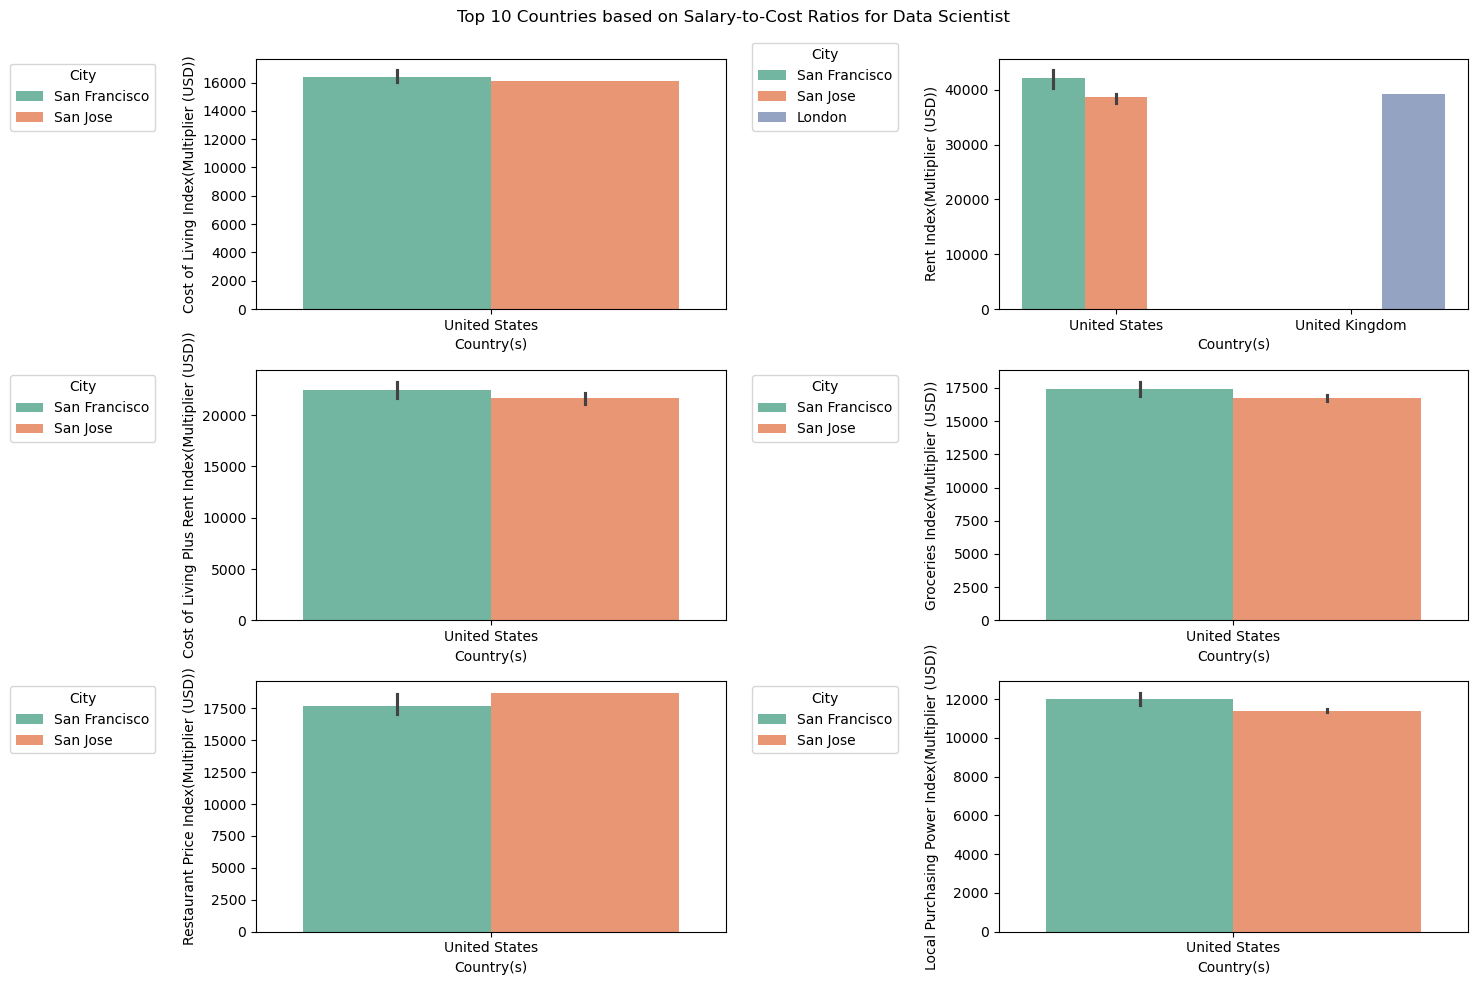

In [4012]:
num_cols  = 3
num_rows = 2
fig, axes = plt.subplots(num_cols, num_rows,figsize = (15,10))
axes = axes.flatten()

for i, column in enumerate(Columns_4_cost_of_living):
    sal_cols = f'{column}(salary to cost ratio)'
    top_10 = top_10_country_each_index[column]
    
    sns.barplot(
        data = top_10,
        x = 'country',
        y = sal_cols,
        hue = 'city',
        palette = 'Set2',
        ax = axes[i])

    axes[i].set_xlabel('Country(s)', fontsize = 10)
    axes[i].set_ylabel(f'{column}(Multiplier (USD))', fontsize= 10)
    axes[i].legend(title = 'City', loc = 'lower right', bbox_to_anchor =(-0.2, .685))
    
fig.suptitle('Top 10 Countries based on Salary-to-Cost Ratios for Data Scientist')
plt.tight_layout()

Althought this is a relatively set of simple plots, I think that it is quite informative. It looks at all cost of living indicies and provides us with the top 10 countires, which turned out to mainly be the US results showing (I will focus on certain cost of living indicies below for a little bit more of a comprehensive review). I filted my data for only Data scientists and from there I found the Multiplyer for several different cost of living Indexes. I then wanted to see what the top 10 countries were where one's money would go the farthest, and it turned out to be mainly the United states. Quite Frankly, this wan't what I was expecting for some reason. The only other country that made it into the top 10 was the United Kingdom, and that was only for 1 category of our cost of living Indexes. I decided to go back and check if we could maybe get some city data because not all the datapoints had cities, and to my surprise, the top  3 cities that came out were San Francisco, San Jose, and London. For the most part San Francisco and San Jose have basically identical cost of living indicies and therefore have almost identical multipliers.Rent  index is slighly higher for San Francisco  than San Jose. Looking at the Rent Multiplier San Jose has more value for rent expense and London has the lowest value for rent(most expensive). Looking at the Grocery and Restaurant index, San Jose seems to be the better option. San Jose would overall maximize the dollar of a Data Scientist.

In [4016]:
country_groups = cost_country_data_scientist_full.groupby('country').agg({
'salary_in_usd': 'mean',
'Cost of Living Index':'mean',
'Rent Index':'median',
'Groceries Index': 'mean'
}).reset_index()

country_groups = country_groups.rename(columns ={
    'salary_in_usd': 'Average salary in USD',
    'Cost of Living Index': 'Average Cost of Living Index',
    'Rent Index': 'Median Rent Index',
    'Groceries Index': 'Average Groceries Index',
    'country':'Country'
})

In [4018]:
top_10_paid = country_groups.nlargest(10,'Average salary in USD')[['Country'
                                                           ,'Average salary in USD'
                                                           ,'Average Cost of Living Index'
                                                           ,'Median Rent Index'
                                                           ,'Average Groceries Index']]

bottom_10_paid = country_groups.nsmallest(10,'Average salary in USD')[['Country'
                                                           ,'Average salary in USD'
                                                           ,'Average Cost of Living Index'
                                                           ,'Median Rent Index'
                                                           ,'Average Groceries Index']]
print('Top 10 highest Average Salary for Data Scientest by Country')
display(top_10_paid)
print('Lowest Average Salary for Data Scientest by Country')
display(bottom_10_paid)

Top 10 highest Average Salary for Data Scientest by Country


,Country,Average salary in USD,Average Cost of Living Index,Median Rent Index,Average Groceries Index
34,United States,215465.032120,73.252000,41.680,74.003684
33,United Kingdom,176727.210526,70.495588,30.055,58.282059
28,Switzerland,172933.250000,124.075714,59.550,126.945714
8,Germany,103998.937500,67.281154,27.635,52.963077
19,Netherlands,100800.000000,76.229286,36.965,65.190000
0,Algeria,100000.000000,29.840000,6.670,30.250000
17,Luxembourg,98962.500000,82.990000,63.430,75.830000
1,Australia,97468.600000,77.601000,37.595,77.064000
25,Singapore,92639.192308,83.980000,66.430,77.080000
2,Austria,91237.000000,72.870000,30.140,66.658000


Lowest Average Salary for Data Scientest by Country


,Country,Average salary in USD,Average Cost of Living Index,Median Rent Index,Average Groceries Index
29,Taiwan,2060.000000,63.600000,20.275,77.905000
12,India,2706.844660,25.376304,5.010,27.320000
18,Mexico,2859.000000,36.645000,15.340,35.843333
31,Ukraine,3433.333333,31.088000,10.740,26.548000
23,Russia,3537.800000,34.770000,10.445,29.440000
35,Vietnam,4000.000000,37.930000,15.030,39.285000
27,Sweden,8475.000000,75.460000,28.430,68.756000
6,China,11690.000000,45.816667,20.440,49.670000
16,Japan,13636.666667,79.313333,42.710,86.570000
22,Poland,18823.333333,40.687000,15.355,33.434000


Sometimes its nice to have a quick visuals for people who don't want to do a super deep dive and just want to see what are the top places where they could maximize their pay or where are the places they should avoid. You can then look at the cost of living indicies and make a call. For example, most of the salaries in the bottom table would put many people under the minimum wage in the US so maybe you avoid these countries. 

In [4021]:
#S2Cr will stand for Salary to cost ratio, names are getting too long.
country_groups['Salary to Cost Ratio for Cost of Living'] = country_groups['Average salary in USD']/country_groups['Average Cost of Living Index']
country_groups['Salary to Cost Ratio for Rent'] = country_groups['Average salary in USD']/country_groups['Median Rent Index']
country_groups['Salary to Cost Ratio for Groceries'] = country_groups['Average salary in USD']/country_groups['Average Groceries Index']


top_10_cost_of_living = country_groups.nlargest(10,'Salary to Cost Ratio for Cost of Living')[['Country', 'Salary to Cost Ratio for Cost of Living']]
top_10_rent = country_groups.nlargest(10,'Salary to Cost Ratio for Rent')[['Country', 'Salary to Cost Ratio for Rent']]
top_10_groceries = country_groups.nlargest(10,'Salary to Cost Ratio for Groceries')[['Country', 'Salary to Cost Ratio for Groceries']]


print('Top 10 Countries where your Salary goes furthest for Cost of living')
display(top_10_cost_of_living)
print('Top 10 Countries where your Salary goes furthest for Rent')
display(top_10_rent)
print('Top 10Countries where your Salary goes furthest for Groceries')
display(top_10_groceries)

Top 10 Countries where your Salary goes furthest for Cost of living


,Country,Salary to Cost Ratio for Cost of Living
0,Algeria,3351.206434
34,United States,2941.421833
33,United Kingdom,2506.925823
8,Germany,1545.736533
28,Switzerland,1393.771948
20,Nigeria,1339.405304
19,Netherlands,1322.326440
1,Australia,1256.022474
2,Austria,1252.051599
17,Luxembourg,1192.462947


Top 10 Countries where your Salary goes furthest for Rent


,Country,Salary to Cost Ratio for Rent
0,Algeria,14992.503748
33,United Kingdom,5880.126785
34,United States,5169.506529
9,Greece,4743.708839
3,Brazil,4051.687328
8,Germany,3763.305138
21,Philippines,3482.496195
30,Turkey,3156.651017
11,Hungary,3112.804878
2,Austria,3027.106835


Top 10Countries where your Salary goes furthest for Groceries


,Country,Salary to Cost Ratio for Groceries
0,Algeria,3305.785124
33,United Kingdom,3032.274667
34,United States,2911.544667
8,Germany,1963.612077
19,Netherlands,1546.249425
9,Greece,1511.052225
2,Austria,1368.732935
28,Switzerland,1362.261428
13,Ireland,1361.248334
3,Brazil,1348.572224


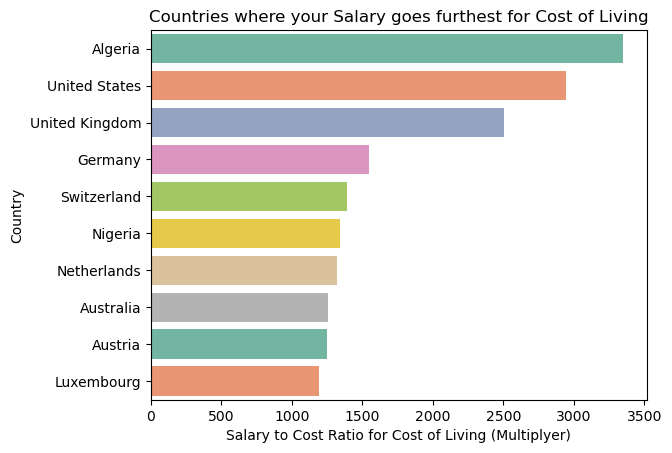

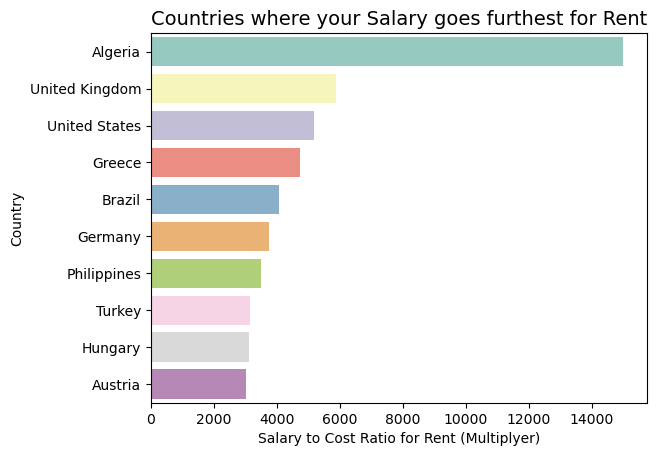

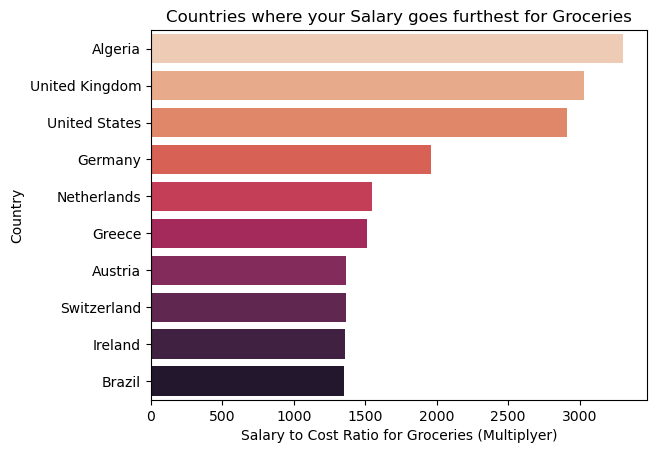

In [4023]:
ax = sns.barplot(top_10_cost_of_living,
           x = 'Salary to Cost Ratio for Cost of Living',
           y = 'Country', 
           palette = 'Set2',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Cost of Living (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Cost of Living', fontsize=12)
plt.show()

ax = sns.barplot(top_10_rent,
           x = 'Salary to Cost Ratio for Rent',
           y = 'Country', 
           palette = 'Set3',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Rent (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Rent', fontsize=14)
plt.show()

ax = sns.barplot(top_10_groceries,
           x = 'Salary to Cost Ratio for Groceries',
           y = 'Country', 
           palette = 'rocket_r',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Groceries (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Groceries', fontsize=12)
plt.show()

While this analysis is similar to the first, I think it is a little more informative because it focuses on 3 specific cost-of-living indicies which help bring more country comparisons into the analysis.

Cost of Living:
Algeria takes the lead ahead of the United states meaning they have exceptional cost of living affordability.They are followed bu the US then the UK which also has favorable cost of living affordability for a Data Scientist salary.

Rent:

Algeria takes the lead again indicating that housing is really affordable. The other countries are not even close here by a landslide. If Algeria isn't an option, the next best bets would be the UK, US or Greece. Hungary and Austria are at the bottom indicating the salaries are not great for covering rent.

Groceries:

Algeria wins again here.  Salaries of a Data Scientist would be very effective and go furthest here for covering grocery costs. The UK and US are not too far behind here, making them good options for groceries. Switzerland, Ireland, Brazil are at the bottom indicating that the salaries there do not go far when it comes to covering groceries.

Overall, Algeria seems to be the winner. It would be the most affordable overall when looking at countries. The US and UK also follow behind closely as far as salary to cost ratio.

I think there is a lot of people in this world and many have kids. I think It would be interesting to simulate the data for a family of 3

In [4027]:
family = 2
groceries = 1.8
cost_live = 1.8

country_groups['Cost of Living Index of a Family of 3'] = country_groups['Average Cost of Living Index']*cost_live
country_groups['Rent Index of a Family of 3'] = country_groups['Median Rent Index']*family
country_groups['Groceries Index of a Family of 3'] = country_groups['Average Groceries Index']*groceries

country_groups['Salary to Cost Ratio for Cost of Living of a Family of 3'] = country_groups['Average salary in USD']/country_groups['Cost of Living Index of a Family of 3']
country_groups['Salary to Cost Ratio for Rent of a Family of 3'] = country_groups['Average salary in USD']/country_groups['Rent Index of a Family of 3']
country_groups['Salary to Cost Ratio for Groceries of a Family of 3'] = country_groups['Average salary in USD']/country_groups['Groceries Index of a Family of 3']


top_10_cost_of_living_for_3_family = country_groups.nlargest(10
                                                             ,'Salary to Cost Ratio for Cost of Living of a Family of 3')[['Country'
                                                                                                                           , 'Cost of Living Index of a Family of 3']]
top_10_rent_for_3_family = country_groups.nlargest(10
                                                   ,'Salary to Cost Ratio for Rent of a Family of 3')[['Country'
                                                                                                       , 'Rent Index of a Family of 3']]
top_10_groceries_for_3_family = country_groups.nlargest(10
                                                        ,'Salary to Cost Ratio for Groceries of a Family of 3')[['Country'
                                                                                                                 , 'Groceries Index of a Family of 3']]
top_10_cost_of_living_for_3_family = top_10_cost_of_living_for_3_family.sort_values(by = 'Cost of Living Index of a Family of 3',
                                                                                   ascending = False)

top_10_rent_for_3_family = top_10_rent_for_3_family.sort_values(by = 'Rent Index of a Family of 3',
                                                                                   ascending = False)

top_10_groceries_for_3_family =top_10_groceries_for_3_family.sort_values(by = 'Groceries Index of a Family of 3',
                                                                                   ascending = False)

print('Top 10 Countries where your Salary goes furthest for Cost of living for a Family of 3')
display(top_10_cost_of_living_for_3_family)
print('Top 10 Countries where your Salary goes furthest for Rent for a Family of 3')
display(top_10_rent_for_3_family)
print('Top 10 Countries where your Salary goes furthest for Groceries for a Family of 3')
display(top_10_groceries_for_3_family)

Top 10 Countries where your Salary goes furthest for Cost of living for a Family of 3


,Country,Cost of Living Index of a Family of 3
28,Switzerland,223.336286
17,Luxembourg,149.382000
1,Australia,139.681800
19,Netherlands,137.212714
34,United States,131.853600
2,Austria,131.166000
33,United Kingdom,126.892059
8,Germany,121.106077
20,Nigeria,67.194000
0,Algeria,53.712000


Top 10 Countries where your Salary goes furthest for Rent for a Family of 3


,Country,Rent Index of a Family of 3
34,United States,83.36
2,Austria,60.28
33,United Kingdom,60.11
8,Germany,55.27
9,Greece,28.85
21,Philippines,26.28
11,Hungary,22.96
3,Brazil,19.36
0,Algeria,13.34
30,Turkey,12.78


Top 10 Countries where your Salary goes furthest for Groceries for a Family of 3


,Country,Groceries Index of a Family of 3
28,Switzerland,228.502286
34,United States,133.206632
2,Austria,119.984400
19,Netherlands,117.342000
13,Ireland,114.777000
33,United Kingdom,104.907706
8,Germany,95.333538
9,Greece,81.513000
0,Algeria,54.450000
3,Brazil,52.349143


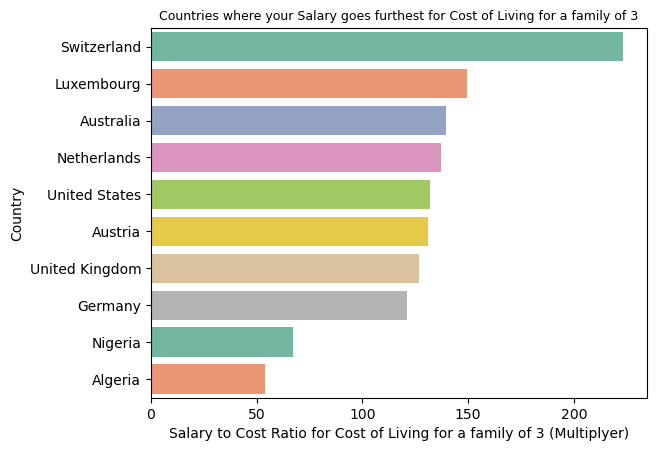

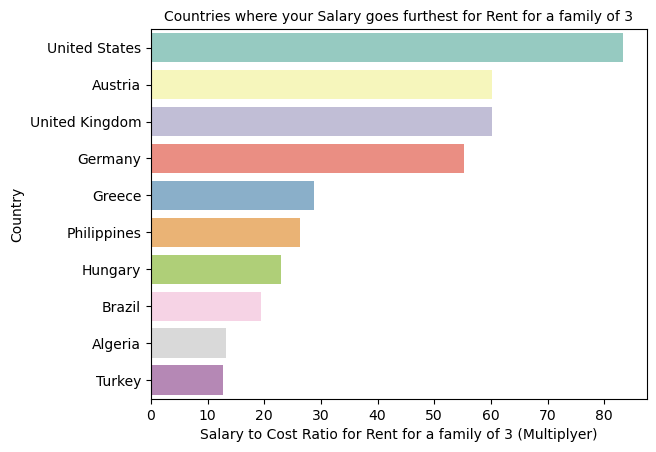

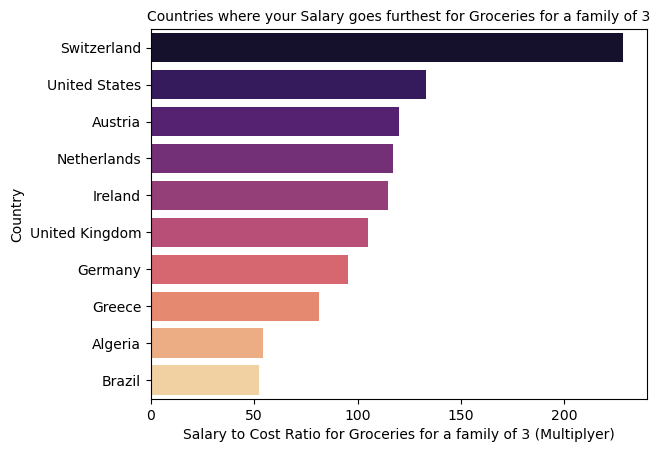

In [4029]:
ax = sns.barplot(top_10_cost_of_living_for_3_family,
           x = 'Cost of Living Index of a Family of 3',
           y = 'Country', 
           palette = 'Set2',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Cost of Living for a family of 3 (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Cost of Living for a family of 3', fontsize=9)
plt.show()

ax = sns.barplot(top_10_rent_for_3_family,
           x = 'Rent Index of a Family of 3',
           y = 'Country', 
           palette = 'Set3',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Rent for a family of 3 (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Rent for a family of 3', fontsize=10)
plt.show()

ax = sns.barplot(top_10_groceries_for_3_family,
           x = 'Groceries Index of a Family of 3',
           y = 'Country', 
           palette = 'magma',
           hue = 'Country')
ax.set_xlabel('Salary to Cost Ratio for Groceries for a family of 3 (Multiplyer)')
ax.set_title('Countries where your Salary goes furthest for Groceries for a family of 3', fontsize=10)
plt.show()

The first major thing to point out is that once family starts to be involved, Algeria, while on the list is at the bottom and does poorly compared to the last set of graphs.

Cost of Living:
When it comes to cost of living, your dollar goes the furthest in Switzerland and it takes the lead by quite a bit. With a Family of 3, Nigeria and Algeria is probably not the place to be on a Data scientist salary. The Us is in the middle here, so not the best but also not the worst.

Rent:

When it comes to rent, US seems to be the best option for a family of 3, followed by a tie between Austria and the UK.

Groceries:

In Switzerland, your dollar goes the furthest when it comes to buying food for a family of 3. The US and Austria follow behind in 2nd and 3rd place. Brazil is at the bottom, so its not ideal at all for a family of 3. 

I think the key takeawys here, if you are an entry level data scientist, who has a family, your ideal location is going to be somewhere in Switzerland or the US because that is where your dollar is going to go the furthest. Even though the US wasn't as high as switzerland, it made it in the top 10 for all 3 categories, where as Switzerland didn't make the list for the rent graph. Switzerland will be the best as far as groceries and cost of living but might be a little tough when it comes to rent.


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(-200000.0, 0, '−200000'),
  Text(0.0, 0, '0'),
  Text(200000.0, 0, '200000'),
  Text(400000.0, 0, '400000'),
  Text(600000.0, 0, '600000'),
  Text(800000.0, 0, '800000'),
  Text(1000000.0, 0, '1000000')])

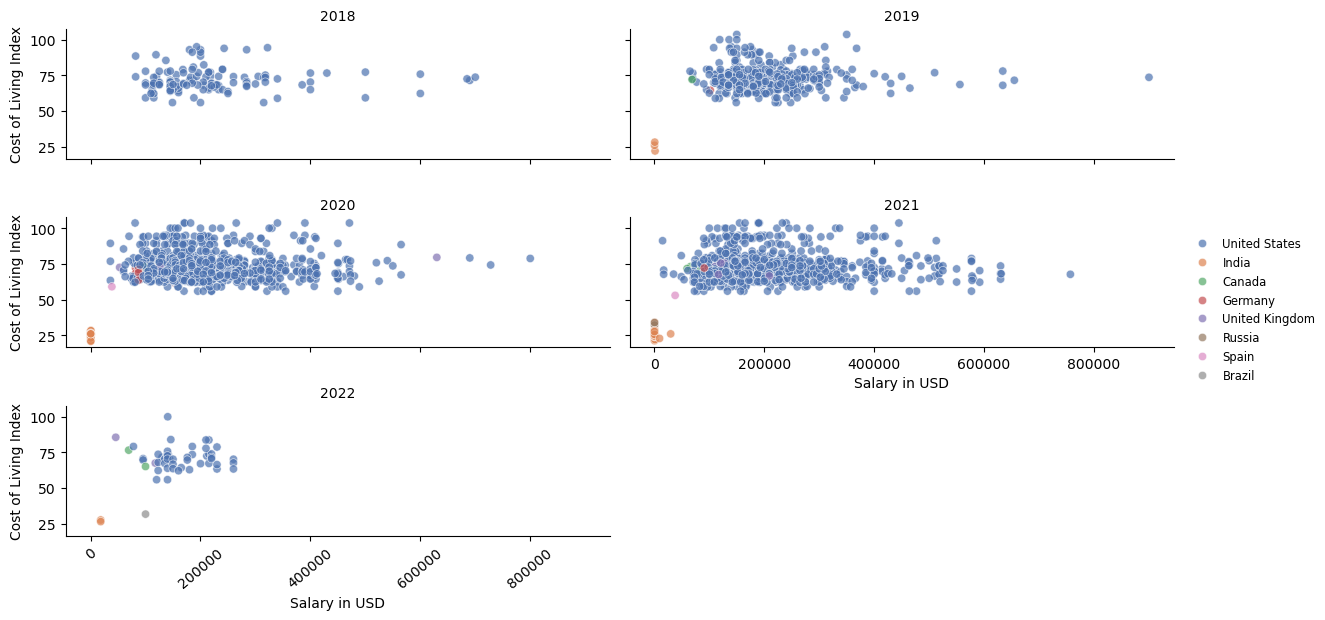

In [4032]:
#There are too many data poins so going to try .sample(frac = 0.01) which
# create multi graphs similar to the first one
data_sample = cost_country_data_scientist_full.sample(frac = 0.01, random_state = 42)

grid = sns.FacetGrid(data = data_sample
                    ,col = 'work_year'
                    ,col_wrap = 2
                    , height = 2
                    ,aspect = 3)

grid.map(sns.scatterplot
         ,'salary_in_usd'
         ,'Cost of Living Index'
         ,data = data_sample
         ,alpha = 0.7
         ,hue = 'country'
         ,palette = 'deep'
        )

grid.set_axis_labels('Salary in USD')
grid.add_legend(fontsize = 'small')
grid.set_titles(col_template =  "{col_name}")
plt.xticks(rotation = 40)

The majority of the points on the graph are overwhelmingly United states. The salary distribution seemed to have expanded over the years but seemed to have dipped in 2022. Cost of Living Index maily clusters between 50 and a 100 but there aresome outliers. The US seems to have higher salary ranges, however the cost of living also seems to be pretty high.India seems to be consistently on the bottof the graphs, indicating low salary but also low cost of living. Germany, Canada, and UK seem to have moderatly high salaries but cost of living seems to be also in the 50 to 100 range.The years 2020 and 2021 seem to have the most compact data probably reflecting pandemic times (shift to remote work).

Based off of all I analyzed, it seems like the US is the place to be as a Data Scientist. The US has high salaries and has pretty good cost of living indicies to keep up with it. If you want a family down the road, it would still be generally affordable to live. Germany also has relatively high salaries but not nearly as high as the US.Since the cost of living indicies in my last graph show it between 50-100, and it did make it on my top 10 graphs, I would say that the salary is relatively balanced with the cost of living. The UK would take second place over germany though because it has high salaries. I t was in the top 10 for my second set of graphs, although it drastically placed lower when a family became involved. The cost of living index did also place between 50 and 100. Lastly, I would say India consistently placed low and would not be a recommended place to take on a Data scientist role.